# **UN SDG - NLP classification task**



### Project Overview

The 17 Sustainable Development Goals (SDGs) are a "shared blueprint for peace and prosperity for people and the planet, now and into the future". Streams of SDG-related documents produced by governments, academia, private and public entities are assessed by United Nations teams to measure such progress according to each SDG. This requires labelling to proceed to more in-depth analyses. Experts have to read the document and identify which SDGs are mentioned, or are related to it. These mapping exercises are time-consuming and subjective to personal knowledge of the links between the document contents and the SDGs. While UNEP has experts in many fields, links to the SDGs that are outside their expertise may be overlooked.
Multi-label classification will be used to solve this problem by evaluating various classification models and use one which has the best score.


***What is NLP?***
It is a subfield of artificial intelligence (AI). It helps machines process and understand the human language so that they can automatically perform repetitive tasks.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Pre-processing of the datasets</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Conclusion</a>

<a href=#ten>10. References</a>



 <a id="one"></a>
# 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
|  Description: Importing Packages  |
| :--------------------------- |
| In this section we imported and briefly discussed the libraries that will be used throughout the analysis and modelling. |

---

### 1.1. Data analysis Packages
To analyze the the data we will need the following packages
<ul> 
    <li><b>Numpy</b></li>
    Numpy is a packages used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.<br>
    <li><b>Pandas</b></li>
    Pandas is mainly used for data analysis and associated manipulation of tabular data in Dataframes. Pandas allows importing data from various file formats such as comma-separated values, JSON, Parquet, SQL database tables or queries, and Microsoft Excel.
    <li><b>Matplotlib</b></li>
    Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is a cross-platform library for making 2D plots from data in arrays. It provides an object-oriented API that helps in embedding plots in applications using Python GUI toolkits such as PyQt, WxPythonotTkinter.
    <li><b>Seaborn</b></li>
    Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.
    <li><b>Wordcloud</b></li>
    A wordcloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.
</ul>





In [70]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd      
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# set plot style
sns.set()

### 1.2. Data Preparation Packages
Before fitting the model to the data it is necessary to do some work on it. THe following packages will help achieve that.

<ul> 
    <li><b>stopwords</b></li>
    Decision trees regression normally use mean squared error (MSE) to decide to split a node in two or more sub-nodes. Suppose we are doing a binary tree the algorithm first will pick a value, and split the data into two subset. For each subset, it will calculate the MSE separately.
    <li><b>tokenizer</b></li>
    A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
    <li><b>WordNetLemmatizer</b></li>
    A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.
    <li><b>CountVectorizer</b></li>
    Stacked generalization consists in stacking the output of individual estimator and use a regressor to compute the final prediction. 
    <li><b>PorterStemmer</b></li>
    A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
    <li><b>SVM</b></li>
    Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.
    <li><b>Seaborn</b></li>
    Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.
</ul>

In [71]:
import nltk   #Importing nltk
from nltk.corpus import stopwords  #importing Stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from nltk.probability import FreqDist

In [72]:
import warnings
warnings.filterwarnings('ignore')

### 1.3. Data Engineering Packages


In [73]:
from sklearn.utils import resample
from nltk.util import ngrams
from imblearn.over_sampling import SMOTE 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

### 1.4. Machine Learning Packages
To analyze the data we will need the following packages
<ul> 
    <li><b>train_test_split</b></li> train_test_split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data.
    <li><b>LogisticRegression</b></li> Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.
    <li><b>DecisionTreeClassifier</b></li> DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
    <li><b>XGBClassifier</b></li> XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.
    <li><b>CatBoostClassifier</b></li> CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone. The CatBoost library can be used to solve both classification and regression challenge.
    <li><b>VotingClassifier</b></li> A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator.
</ul>

In [74]:
# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB

# Model performance metric libraries
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

<a id="two"></a>
# 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  Description: Loading the data  |
| :--------------------------- |
| In this section we are going to load the data from the `train` and  `test` file into DataFrames. |

---

For the pupose of the model development, two datasets have been provided in two csv files
<ul>
<li><b>Train Data Set</b></li>
Training data is an extremely large dataset that is used to teach a machine learning model. Training data is used to teach prediction models that use machine learning algorithms how to extract features that are relevant to specific business goals.
<li><b>Test Data Set</b></li>
Test data is data which has been specifically identified for use in tests, typically of a computer program. Some data may be used in a confirmatory way, typically to verify that a given set of input to a given function produces some expected result.
</ul>

We will load these datasets in two data frames so we can use them for the model development. After loading the data, we will display the head of the dataset to get the first idea of the type of data we are working with.


In [75]:
#Loading the train dataset
train_data = pd.read_csv('train.csv')
train_data.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,id
0,10.18356/5950d914-en,bf7763beb5ad7a16764d1b7fa87ab018,Indicators for targets 9.b and 9.c have data a...,9,4,5,0.111111,1
1,10.18356/5950d914-en,b6415a528064b85fdde4b4c61239ed3a,Manufacturing value added as a percentage of G...,9,0,3,1.000000,2
2,10.18356/31959a6d-en,29127def7e81b999b87c8e887a4fe882,To Share or Not to Share: That is the Question...,5,2,7,0.555556,3
3,10.1787/eco/surveys-cze-2014-6-en,459db322b9e44630320fda76783e0f69,"As of 2004, parents can work without losing th...",4,2,2,0.000000,4
4,10.1787/9789264119536-11-en,8b7d8c6c605fe9695d08ab03d601e0e9,A question of considerable policy relevance is...,10,1,4,0.600000,5


In [76]:
#Loading the test dataset
test_data = pd.read_csv('test.csv')
test_data.head()

,doi,text_id,text,labels_negative,labels_positive,agreement,id
0,10.1787/9789264204256-4-en,eb6faaeb2810029e3a2b9edf4b3d80e8,Nearly 3 out of 10 adults in these countries p...,1,4,0.6,1
1,10.1787/9789264167865-7-en,fa7fa2ce7b03d60101073df216c05713,As urban areas become denser and rely more on ...,0,4,1.0,2
2,10.18356/ab2e0473-en,fa8afb153838b92b0e9d78b375689fde,Women who work outside their homes need to pro...,0,9,1.0,3
3,10.18356/faf8a648-en,e86113bf51a0aed83b8d3e3ad0bf385d,The key governance bodies of this systemic res...,3,3,0.0,4
4,10.18356/f3e7d816-en,34a60596f64e0723734228a27440a9e9,"In terms of policies, the change of focus from...",0,3,1.0,5


<a id="three"></a>
# 3. Pre-processing of the datasets
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="four"></a>
# 4. Exploratory Data Analysis(EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

### The number of records and columns

In [77]:
train_data.shape

(25944, 8)

In [78]:
test_data.shape

(6487, 7)

In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doi              25944 non-null  object 
 1   text_id          25944 non-null  object 
 2   text             25944 non-null  object 
 3   sdg              25944 non-null  int64  
 4   labels_negative  25944 non-null  int64  
 5   labels_positive  25944 non-null  int64  
 6   agreement        25944 non-null  float64
 7   id               25944 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.6+ MB


From these, we can see that there are no null values in our dataset. 

### Columns

In [80]:
train_data.columns.to_list()

['doi',
 'text_id',
 'text',
 'sdg',
 'labels_negative',
 'labels_positive',
 'agreement',
 'id']

In [81]:
test_data.columns.to_list()

['doi',
 'text_id',
 'text',
 'labels_negative',
 'labels_positive',
 'agreement',
 'id']

### Classes

In [82]:
train_data.sdg.unique()

array([ 9,  5,  4, 10,  3,  1, 13, 11,  2,  7,  6,  8, 15, 12, 14])

### Distribution Of Data

In [83]:
# Checking the distribution of the SDG classes 
train_df['sdg'].value_counts()

5     3438
4     2999
7     2473
6     2247
1     2190
3     2132
2     1963
11    1798
13    1695
8     1218
14     917
9      873
10     843
15     785
12     373
Name: sdg, dtype: int64

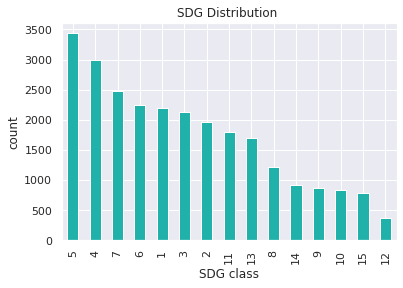

In [84]:
# graphical representaion of class distribution 
train_df['sdg'].value_counts().plot(kind = 'bar', color=['lightseagreen'])
plt.title('SDG Distribution ')
plt.xlabel('SDG class')
plt.ylabel('count')
plt.show()

### Most Common Words

In [85]:
#extract all words in the cleaned data
all_words = train_data['text'].apply(join_w)
#' '.join(word for word in train_df.text_lemmatized)
all_words

NameError: ignored

In [ ]:
# Visualization of the data
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(join_w(all_words))
fig, ax = plt.subplots(2, 1, figsize = (10, 10), facecolor = None)
#plt.figure(figsize=(10, 7))
ax[0].imshow(wordcloud, interpolation="bilinear")
ax[0].set_title("All Words")
ax[0].axis('off')
#plt.show()

mostcommon = FreqDist(join_w(all_words).split(' ')).most_common(20)
x, y = zip(*mostcommon)
ax[1].bar(x, y, color='mediumspringgreen')
ax[1].set_xlabel('Words')
ax[1].set_ylabel('Frequency of Words')
ax[1].tick_params(axis='x', labelrotation=60)

plt.tight_layout()
plt.show()

## Data Pre-processing

### i. Natural Language Processing

### Text Cleaning

- Lowercase Conversion
- Remove Punctuations
- Tokenization
- Remove stop words
- Stemming
- Lemmatizaton

#### Convert to Lowercase

In [ ]:
def lower(df):
    df['text'] = df['text'].str.lower()
    return df['text']

#### Remove Punctuation and Digits

In [ ]:
def remove_punct(words):
    text=[]
    words=words.split()
    for word in words:
        text.append(''.join([l for l in word if l.isalpha()]))
    return ' '.join(text)

### Tokenization

In [ ]:
tokeniser = TreebankWordTokenizer()

### Remove Stop Words

In [ ]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

### Stemming

In [ ]:
#function to stem our words
def return_stemmer(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

### Lemmatization

In [ ]:
#function to lemmatize our words
def return_lemmer(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

### Pre-processing pipleline

In [ ]:
def pre_process(df):
    df['text']=lower(df)
    df['text_punct']=df['text'].apply(remove_punct)
    df['text_token'] = df['text_punct'].apply(tokeniser.tokenize)
    df['text_stop']=df['text_token'].apply(remove_stop_words)
    df['text_stemmed'] = df['text_stop'].apply(return_stemmer)
    df['text_lemmatized'] = df['text_stop'].apply(return_lemmer)
    
    return df

In [ ]:
#preprocessing the train data
pre_process(train_data)
train_data.head()

In [ ]:
#preprocessing the test data
test_data=pre_process(test_data)

Saving the pre-processed data to a CSV file so that we do not have to repeat the process each time:

In [ ]:
#data.to_csv('clean_train.csv', index=None)
from ast import literal_eval
train_df=pd.read_csv('clean_train.csv', converters={'text_lemmatized': literal_eval})
train_df.head()

### iii. Drop Observations

In [ ]:
train_df['percentage_positive']=(train_df['labels_positive']/(train_df['labels_positive']+train_df['labels_negative']))*100

In [ ]:
train_df.head()

In [ ]:
train_df['percentage_positive'].hist()

In [ ]:
sns.distplot(train_df['percentage_positive'])

In [ ]:
data1=train_df[train_df['percentage_positive']==100]
data1.shape

In [ ]:
data1['sdg'].value_counts().plot(kind='bar')

### iii. Drop Columns

In [ ]:
def drop(df):
    columns=['doi', 'text_id', 'labels_negative', 'labels_positive', 'agreement','percentage_positive']
    df=df.drop(columns, axis=1)
    return df

In [ ]:
data1_train=drop(data1)
data1_train=data1_train.set_index('id')
data1_train.head()

## Data Engineering

In [ ]:
def join_w(words):
    words=' '.join(words)
    return words

In [ ]:
#Vectorize our text data so as to transform our text into numbers. This way, it can be accpeted by our model.
vect = TfidfVectorizer(lowercase=False, stop_words='english', ngram_range=(1, 4))
vect_dict= vect.fit_transform(data1_train['text_lemmatized'].apply(join_w))

<a id="five"></a>
# 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="six"></a>
# 6. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="seven"></a>
# 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="eight"></a>
# 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="nine"></a>
# 9.  Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

<a id="ten"></a>
# 10. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---